# 08 - MODELO CLASIFICACIÓN TRAS THE BEST ESTIMATOR Y PRESELECCIÓN DE VARIABLES
## v3 - XGBCLASSIFIER con parámetros para evitar el sobreajuste

Hemos comparado varios modelos de clasificación con parámetros y preselección de variables. Pero el modelo que ha obtenido mejores resultados ha sido el modelo XGB Classifier (v3) con parámetros para evitar el sobre ajuste y todas las variables del dataset. 

En este notebook entrenaremos el modelo definitivo (v3) con todos los datos de trabajo y crearemos el modelo de ejecucción para predecir con los datos de prueba (datos nuevos)

- 'algoritmo': XGBClassifier
- 'algoritmo__learning_rate': 0.05,
- 'algoritmo__max_depth': 10,
- 'algoritmo__n_estimators': 300,
- 'algoritmo__n_jobs': -1,
- 'algoritmo__reg_alpha': 0.5,
- 'algoritmo__reg_lambda': 0.1,
- 'algoritmo__verbosity': 0

## IMPORTACIÓN DE PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from xgboost import XGBClassifier

#metricas de evaluación
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report

#Crear Pipeline
from sklearn.pipeline import make_pipeline

import cloudpickle

## IMPORTAR LOS DATOS

La preselección de variables no ha dado mejor resultados. Así que utilizaremos todas las variables del df_tablon.pickle

### CARGAR LOS DATOS

In [2]:
df = pd.read_pickle('../../02_Datos/03_Trabajo/df_tablon.pickle')
df.head()

,precio_compra_oe,precio_mto_oe,n_puertas_oe,n_personas_oe,t_maletero_oe,nivel_seguridad_oe,aceptabilidad_oe
0,3.0,3.0,0.0,0.0,0.0,0.0,0.0
1,3.0,3.0,0.0,0.0,0.0,1.0,0.0
2,3.0,3.0,0.0,0.0,0.0,2.0,0.0
3,3.0,3.0,0.0,0.0,1.0,0.0,0.0
4,3.0,3.0,0.0,0.0,1.0,1.0,0.0


### SEPARAR PREDICTORAS Y TARGET

In [3]:
target = 'aceptabilidad_oe'
x = df.drop(columns= target).copy()
y = df[target].copy()

## MODELIZAR

### CARTGAR EL MEJOR MODELO CON EL ALGORITMO, PARÁMETROS Y VALORES

In [6]:
modelo = pd.read_pickle('../../04_Modelos/Best_Estimator/XGBClassifier_v03.pickle')

### EXAMINAR MODELO

In [14]:
modelo.best_estimator_

Pipeline(steps=[('algoritmo',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=300,
                               n_jobs=-1, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [15]:
modelo.best_params_

{'algoritmo': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.05, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=10, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=300, n_jobs=-1, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 'algoritmo__learning_rate': 0.05,
 'algoritmo__max_depth': 10,
 'algoritmo__n_estimators': 300,
 'algoritmo__n_jobs': -1,
 'algoritmo__reg_alpha': 0.5,
 'algoritmo__reg_lambda': 0.1,
 'algoritmo__verbosity': 0}

### PREDECIR SOBRE LA VALIDACIÓN

In [16]:
pred = modelo.best_estimator_.predict(x)

### EVALUAR SOBRE LA VALIDACIÓN

In [17]:
t_accuracy = accuracy_score(y, pred)
t_report = classification_report(y, pred)

print(f"Accuracy: {t_accuracy}\n")
print(f"Classification Report:\n{t_report}")

Accuracy: 0.9950413223140496

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       858
         1.0       0.98      1.00      0.99       259
         2.0       1.00      0.96      0.98        48
         3.0       0.96      0.98      0.97        45

    accuracy                           1.00      1210
   macro avg       0.99      0.98      0.98      1210
weighted avg       1.00      1.00      1.00      1210



## REPORTING DEL MODELO

Matrix de Confusión MultiClass y ROC CHART MULTICLASS

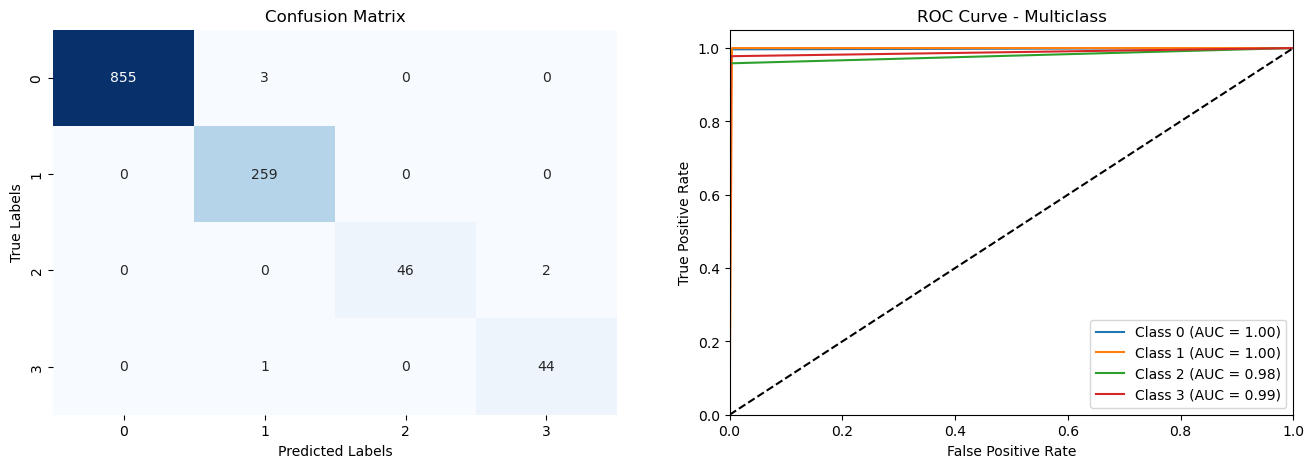

In [19]:
# Crear subplots
f, ax = plt.subplots(1, 2, figsize=(16, 5))
ax = ax.flat

# Calcular la matriz de confusión
cm = confusion_matrix(y, pred)

# Crear un mapa de calor de la matriz de confusión
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False, ax=ax[0])
ax[0].set_xlabel("Predicted Labels")
ax[0].set_ylabel("True Labels")
ax[0].set_title("Confusion Matrix")

# Binarizar las etiquetas verdaderas y las predicciones para cada clase
n_classes = len(np.unique(y))
binarized_val_y = label_binarize(y, classes=np.arange(n_classes))
binarized_pred = label_binarize(pred, classes=np.arange(n_classes))

# Calcular la curva ROC y el área bajo la curva (AUC) para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(binarized_val_y[:, i], binarized_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(n_classes):
    ax[1].plot(fpr[i], tpr[i], label='Class {0} (AUC = {1:.2f})'.format(i, roc_auc[i]))

ax[1].plot([0, 1], [0, 1], 'k--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve - Multiclass')
ax[1].legend(loc="lower right");


## CREAR PIPELINE DE ENTRENAMIENTO Y EJECUCIÓN

### INSTANCIAR EL MODELO

In [20]:
modelo = XGBClassifier(
                        learning_rate =  0.05,
                        max_depth =  10,
                        n_estimators =  300,
                        n_jobs =  -1,
                        reg_alpha =  0.5,
                        reg_lambda =  0.1,
                        verbosity = 0
                        )

### CREAR Y GUARDAR EL PIPE FINAL DE ENTRENAMIENTO

In [21]:
#crear pipe de entrenamiento
pipe_entrenamiento = make_pipeline(modelo)

In [22]:
# Guardar pipe de entrenamiento
nombre_pipe_entrenamiento = 'pipe_entrenamiento_v3.pickle'
ruta_pipe_entrenamiento = '../../04_Modelos/' + nombre_pipe_entrenamiento

with open (ruta_pipe_entrenamiento, mode= 'wb') as file:
    cloudpickle.dump(pipe_entrenamiento, file)

### ENTRENAR Y GUARDAR EL PIPE DE EJECUCCIÓN

In [24]:
# Entrenar pipe de entrenamiento
pipe_ejecucion = pipe_entrenamiento.fit(x,y)

In [25]:
nombre_pipe_ejecucion = 'pipe_ejecucion_v3.pickle'
ruta_pipe_ejecucion = '../../04_Modelos/' + nombre_pipe_ejecucion

with open (ruta_pipe_ejecucion, mode= 'wb') as file:
    cloudpickle.dump(pipe_ejecucion, file)

**CONCLUSIÓN:** El modelo ha dado muy buenos resultados incluyendo todos los datos del df_tablon, obteniendo un 99,5% de accuracy.